In [2]:
import sys
import pandas as pd              # python package for dataframes
import os                        # used to change directory paths
import matplotlib.pyplot as plt  # python package for plotting
import numpy as np
#can't import seaborn
import seaborn as sns #package for plotting
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, HTML  # Make tables pretty
from datetime import datetime
import pandas as pd


## Import Data

In [3]:
path_jp = '//cskma0294/F/Evaluations/JobPath/Python/Analysis/JPOutcomes/'
filename_jp = 'linkedclaims_casuals_2018m04_v2_flat_20160101_with_income_36Vars__7BGM_full_clusters_jp_summary_status.csv'
path_earnings='//cskma0294/F/Evaluations/JobPath/Python/Data/Earnings/'
filename_earnings = 'new_earnings_11jul2018.csv'
data_jp = pd.read_csv(path_jp+filename_jp, encoding= 'utf-8')
data_jp=data_jp[~data_jp['hist_lr_0'].str.contains('C', case=False)]
data_jp=data_jp[data_jp['age']<60]
data_jp=data_jp[data_jp['jp_flag_before_aw']!= 1]
data_jp=data_jp[data_jp['duration_days_0'] > 299]
data_earnings = pd.read_csv(path_earnings+filename_earnings, encoding= 'utf-8')

In [4]:
new_path_jp = '//cskma0294/F/Evaluations/JobPath/Quarterly_status/'
new_filename_jp = 'q_status_all.csv'
new_data_jp = pd.read_csv(new_path_jp+new_filename_jp, encoding= 'utf-8')
new_data_jp['ppsn'].nunique()

746286

In [5]:
list(new_data_jp)

['ppsn',
 'StatusEnd_Q12014',
 'StatusEnd_Q22014',
 'StatusEnd_Q32014',
 'StatusEnd_Q42014',
 'StatusEnd_Q12015',
 'StatusEnd_Q22015',
 'StatusEnd_Q32015',
 'StatusEnd_Q42015',
 'StatusEnd_Q12016',
 'StatusEnd_Q22016',
 'StatusEnd_Q32016',
 'StatusEnd_Q42016',
 'StatusEnd_Q12017',
 'StatusEnd_Q22017',
 'StatusEnd_Q32017',
 'StatusEnd_Q42017',
 'StatusEnd_Q12018',
 'StatusEnd_Q22018',
 'StatusEnd_Q32018',
 'Earn2014',
 'WIES2014',
 'Earn2015',
 'WIES2015',
 'Earn2016',
 'WIES2016',
 'Earn2017',
 'WIES2017']

In [6]:
list(data_jp)

['cluster',
 'ppsn',
 'Amended Referral Status',
 'Cancellationsubcategory',
 'Claim Office Code',
 'Claim Office Name',
 'Date of Cancellation',
 'Date of Interview',
 'Date_paused',
 'Dateresumed',
 'End Date',
 'Local Office Code',
 'Local Office Name',
 'PPP Agreed Date',
 'Paused_reason',
 'Reason for Cancellation',
 'Referal Status Description',
 'Referral Id',
 'Start Date',
 'prev_jp_completed',
 'imputed_ph1_end_date',
 'analysis_start_date',
 'analysis_end_date',
 'jp_started_before_aw_completed_ph1_in_aw',
 'jp_started_in_aw_completed_ph1_after_aw',
 'jp_ph1_completed_in_aw_firstQ_year2_var',
 'jp_ph1_completed_in_aw_secondQ_year2_var',
 'jp_ph1_completed_in_aw_thirdQ_year2_var',
 'jp_ph1_completed_in_aw_fourthQ_year2_var',
 'jp_ph1_not_completed_in_aw',
 'jp_flag_in_aw',
 'cancelled_flag_in_aw',
 'jp_cancelled_before_start_in_aw',
 'jp_cancelled_in_aw_start_before_aw',
 'jp_cancelled_in_aw_start_in_aw_var',
 'jp_cancelled_afer_aw_start_in_aw',
 'paused_flag_in_aw',
 'jp_pau

In [9]:
data_jp_m = pd.merge(new_data_jp, data_jp, on=['ppsn']) #, how='left')
list(data_jp_m)

['ppsn',
 'StatusEnd_Q12014',
 'StatusEnd_Q22014',
 'StatusEnd_Q32014',
 'StatusEnd_Q42014',
 'StatusEnd_Q12015',
 'StatusEnd_Q22015',
 'StatusEnd_Q32015',
 'StatusEnd_Q42015',
 'StatusEnd_Q12016',
 'StatusEnd_Q22016',
 'StatusEnd_Q32016',
 'StatusEnd_Q42016',
 'StatusEnd_Q12017',
 'StatusEnd_Q22017',
 'StatusEnd_Q32017',
 'StatusEnd_Q42017',
 'StatusEnd_Q12018',
 'StatusEnd_Q22018',
 'StatusEnd_Q32018',
 'Earn2014',
 'WIES2014',
 'Earn2015',
 'WIES2015',
 'Earn2016',
 'WIES2016',
 'Earn2017',
 'WIES2017',
 'cluster',
 'Amended Referral Status',
 'Cancellationsubcategory',
 'Claim Office Code',
 'Claim Office Name',
 'Date of Cancellation',
 'Date of Interview',
 'Date_paused',
 'Dateresumed',
 'End Date',
 'Local Office Code',
 'Local Office Name',
 'PPP Agreed Date',
 'Paused_reason',
 'Reason for Cancellation',
 'Referal Status Description',
 'Referral Id',
 'Start Date',
 'prev_jp_completed',
 'imputed_ph1_end_date',
 'analysis_start_date',
 'analysis_end_date',
 'jp_started_before

In [10]:
data_jp_m['ppsn'].nunique()

110364

In [14]:
data_jp_m['StatusEnd_Q12016'].value_counts()

UA          91798
C-UA         1229
BTW           900
DA+UA         805
CA+UA         735
UB            526
DA            513
SEMP          368
INTN          332
CA            285
BTE           254
OFP           242
Deceased       68
UBCO           62
FASS           39
FIS            33
BTW+FIS        31
FIS+BTW        26
PTJI           23
IP+UA          19
OFPJST         17
IP             13
C-UB           11
WCP            10
WCP+UA          8
WPGO            7
SPFT            7
FISH            5
OFP+UA          5
CA+OFP          5
CA+C-UA         3
YDI             3
LMAF            3
UA+OFP          2
UA+FIS          1
DA+SEMP         1
CA+DA+UA        1
CA+DA           1
FIS+UA          1
CA+BTE          1
DA+BTE          1
DA+INTN         1
BTW+UBCO        1
Name: StatusEnd_Q12016, dtype: int64

In [14]:
data_jp.head()

,cluster,ppsn,Amended Referral Status,Cancellationsubcategory,Claim Office Code,Claim Office Name,Date of Cancellation,Date of Interview,Date_paused,Dateresumed,...,StartDate_P16,ada_code_rank_P16,family_flag_rank_P16,hist_lls_P16,hist_lr_P16,lr_flag_P16,marital_status_rank_P16,occupation_rank_P16,status_simple_P16,status_P16
0,2,0099665M,b'nan',b'nan',NaN,NaN,NaN,2016-08-15,NaN,NaN,...,1998-09-16,5,3,UA-UAJPTH-UA,UA,1,2.0,2.0,On Live Register,On Live Register (excluding casual workers) - JA
11,2,0206477C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2005-02-23,5,3,UA,UA,1,2.0,5.0,On Live Register,On Live Register (excluding casual workers) - JA
15,2,0202920T,b'nan',b'nan',NaN,NaN,NaN,2016-04-22,NaN,NaN,...,2012-06-25,4,1,UB-UA-UAJPTH-UA,UB-UA,1,2.0,7.0,On Live Register,On Live Register (excluding casual workers) - JA
25,5,0205276K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012-02-16,6,3,UA,UA,1,2.0,2.0,On Live Register,On Live Register (excluding casual workers) - JA
29,2,0202425J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2009-04-22,5,3,UA,UA,1,2.0,7.0,On Live Register,On Live Register (excluding casual workers) - JA


In [11]:
data_jp_m.to_csv(path_jp+'qstatus_'+filename_jp, encoding= 'utf-8')

In [4]:
list(data_earnings)

['RSI_NO',
 'Class_A_Earn2005',
 'Class_A_Earn2006',
 'Class_A_Earn2007',
 'Class_A_Earn2008',
 'Class_A_Earn2009',
 'Class_A_Earn2010',
 'Class_A_Earn2011',
 'Class_A_Earn2012',
 'Class_A_Earn2013',
 'Class_A_Earn2014',
 'Class_A_Earn2015',
 'Class_A_Earn2016',
 'Class_A_Earn2017',
 'Class_S_Earn2005',
 'Class_S_Earn2006',
 'Class_S_Earn2007',
 'Class_S_Earn2008',
 'Class_S_Earn2009',
 'Class_S_Earn2010',
 'Class_S_Earn2011',
 'Class_S_Earn2012',
 'Class_S_Earn2013',
 'Class_S_Earn2014',
 'Class_S_Earn2015',
 'Class_S_Earn2016',
 'Class_S_Earn2017',
 'Class_Other_Earn2005',
 'Class_Other_Earn2006',
 'Class_Other_Earn2007',
 'Class_Other_Earn2008',
 'Class_Other_Earn2009',
 'Class_Other_Earn2010',
 'Class_Other_Earn2011',
 'Class_Other_Earn2012',
 'Class_Other_Earn2013',
 'Class_Other_Earn2014',
 'Class_Other_Earn2015',
 'Class_Other_Earn2016',
 'Class_Other_Earn2017',
 'Class_A_weeks2005',
 'Class_A_weeks2006',
 'Class_A_weeks2007',
 'Class_A_weeks2008',
 'Class_A_weeks2009',
 'Class_

In [5]:
print (data_earnings.shape)
data_earnings.head(2)

(1907397, 53)


,RSI_NO,Class_A_Earn2005,Class_A_Earn2006,Class_A_Earn2007,Class_A_Earn2008,Class_A_Earn2009,Class_A_Earn2010,Class_A_Earn2011,Class_A_Earn2012,Class_A_Earn2013,...,Class_A_weeks2008,Class_A_weeks2009,Class_A_weeks2010,Class_A_weeks2011,Class_A_weeks2012,Class_A_weeks2013,Class_A_weeks2014,Class_A_weeks2015,Class_A_weeks2016,Class_A_weeks2017
0,0006908M,NaN,NaN,NaN,NaN,NaN,12500.0,16866.0,1023.0,NaN,...,NaN,NaN,28.0,46.0,5.0,NaN,NaN,NaN,NaN,NaN
1,0028794W,5572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print (data_jp.shape)
data_jp.head(2)

(110364, 295)


,cluster,ppsn,Amended Referral Status,Cancellationsubcategory,Claim Office Code,Claim Office Name,Date of Cancellation,Date of Interview,Date_paused,Dateresumed,...,StartDate_P16,ada_code_rank_P16,family_flag_rank_P16,hist_lls_P16,hist_lr_P16,lr_flag_P16,marital_status_rank_P16,occupation_rank_P16,status_simple_P16,status_P16
0,2,0099665M,b'nan',b'nan',NaN,NaN,NaN,2016-08-15,NaN,NaN,...,1998-09-16,5,3,UA-UAJPTH-UA,UA,1,2.0,2.0,On Live Register,On Live Register (excluding casual workers) - JA
11,2,0206477C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2005-02-23,5,3,UA,UA,1,2.0,5.0,On Live Register,On Live Register (excluding casual workers) - JA


##  Data merging & manipulation

In [7]:
data_earnings.fillna(0, inplace=True)
data_earnings.describe()

,Class_A_Earn2005,Class_A_Earn2006,Class_A_Earn2007,Class_A_Earn2008,Class_A_Earn2009,Class_A_Earn2010,Class_A_Earn2011,Class_A_Earn2012,Class_A_Earn2013,Class_A_Earn2014,...,Class_A_weeks2008,Class_A_weeks2009,Class_A_weeks2010,Class_A_weeks2011,Class_A_weeks2012,Class_A_weeks2013,Class_A_weeks2014,Class_A_weeks2015,Class_A_weeks2016,Class_A_weeks2017
count,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,...,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06
mean,1.157814e+04,1.320052e+04,1.470237e+04,1.488343e+04,1.247458e+04,1.140092e+04,1.128966e+04,1.166683e+04,1.181458e+04,1.262499e+04,...,2.633050e+01,2.305344e+01,2.185866e+01,2.178265e+01,2.193495e+01,2.166851e+01,2.314401e+01,2.413756e+01,2.509801e+01,2.550060e+01
std,1.787285e+04,1.906936e+04,2.069154e+04,2.221673e+04,1.997413e+04,1.798272e+04,1.810695e+04,1.966912e+04,2.071185e+04,2.115282e+04,...,2.318673e+01,2.336954e+01,2.336978e+01,2.341282e+01,2.351141e+01,2.357444e+01,2.366190e+01,2.379077e+01,2.391175e+01,2.402538e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.661000e+03,6.144000e+03,8.428000e+03,8.345000e+03,3.840000e+03,1.910000e+03,1.654000e+03,1.573000e+03,1.038000e+03,3.135000e+03,...,2.900000e+01,1.400000e+01,9.000000e+00,8.000000e+00,8.000000e+00,6.000000e+00,1.400000e+01,1.800000e+01,2.300000e+01,2.600000e+01
75%,1.916100e+04,2.170900e+04,2.389000e+04,2.429200e+04,2.078500e+04,1.906800e+04,1.878000e+04,1.890700e+04,1.937700e+04,2.077000e+04,...,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
max,3.992043e+06,4.792412e+06,6.597313e+06,1.103540e+07,9.956779e+06,3.286646e+06,1.231165e+06,6.765317e+06,7.805156e+06,6.756370e+06,...,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01


In [8]:
#col_list2013_2015= ['Class_A_Earn2013', 'Class_A_Earn2014', 'Class_A_Earn2015', 'Class_S_Earn2013', 'Class_S_Earn2014', 
#                    'Class_S_Earn2015', 'Class_Other_Earn2013', 'Class_Other_Earn2014','Class_Other_Earn2015']

#data_earnings['Sum_2013_2015'] = (data_earnings[col_list2013_2015].sum(axis=1))

# Can't use Class S as it's not available for 2017
#col_list2013 = ['Class_A_Earn2013', 'Class_S_Earn2013', 'Class_Other_Earn2013']
#col_list2014 = ['Class_A_Earn2014', 'Class_S_Earn2014', 'Class_Other_Earn2014']
#col_list2015 = ['Class_A_Earn2015', 'Class_S_Earn2015', 'Class_Other_Earn2015']



#data_earnings['Sum_2013'] = (data_earnings[col_list2013].sum(axis=1))
#data_earnings['Sum_2014'] = (data_earnings[col_list2014].sum(axis=1))
#data_earnings['Sum_2015'] = (data_earnings[col_list2015].sum(axis=1))

#col_list_sum_2013_2015 = ['Sum_2013', 'Sum_2014', 'Sum_2015']

#data_earnings['mean_2013_2015'] = (data_earnings[col_list_sum_2013_2015].mean(axis=1))
to_keep=['RSI_NO',
         'Class_A_Earn2013',
     'Class_A_Earn2014',
     'Class_A_Earn2015',
     'Class_A_Earn2016',
     'Class_A_Earn2017',]
data_earnings=data_earnings[to_keep]
#data_earnings.isnull().any()
data_earnings.rename(columns={'RSI_NO': 'ppsn'}, inplace=True)

In [9]:

to_keep_jp = ['cluster','ppsn','age',
'duration_days_0',
'sex',
'LM_code_rank_P1',
'occupation_rank_P1',
'ada_code_rank_P1',
'family_flag_rank_P1',
'marital_status_rank_P1',
'LM_code_rank_P2',
'occupation_rank_P2',
'ada_code_rank_P2',
'family_flag_rank_P2',
'marital_status_rank_P2',
'LM_code_rank_P3',
'occupation_rank_P3',
'ada_code_rank_P3',
'family_flag_rank_P3',
'marital_status_rank_P3',
'LM_code_rank_P4',
'occupation_rank_P4',
'ada_code_rank_P4',
'family_flag_rank_P4',
'marital_status_rank_P4',
'LM_code_rank_P5',
'occupation_rank_P5',
'ada_code_rank_P5',
'family_flag_rank_P5',
'marital_status_rank_P5',
'LM_code_rank_P6',
'occupation_rank_P6',
'ada_code_rank_P6',
'family_flag_rank_P6',
'marital_status_rank_P6',
'LM_code_rank_P7',
'occupation_rank_P7',
'ada_code_rank_P7',
'family_flag_rank_P7',
'LM_code_rank_P8',
'occupation_rank_P8',
'ada_code_rank_P8',
'family_flag_rank_P8',
'marital_status_rank_P7',
'marital_status_rank_P8',
'jp_started_P1',
'jp_started_P2',
'jp_started_P3', 'jp_started_P4', 'jp_started_P5', 'jp_started_P6', 
'jp_started_P7', 'jp_started_P8']

data_jp=data_jp[to_keep_jp]
data_jp.loc[:, 'Duration Bands'] = (data_jp['duration_days_0']).apply(lambda x : "0" if x < 365 else ("1"   if x < 730 else ("2" if x < 1095 else ("3"))))
data_jp['Duration Bands']=data_jp['Duration Bands'].astype(int)
data_final=pd.merge(data_jp, data_earnings, on='ppsn', how='left')
#data_final.fillna({'Sum_2013_2015':0, 'Sum_2013':0, 'Sum_2014':0, 'Sum_2015':0, 'mean_2013_2015':0, 'Sum_2017':0}, inplace=True)
#data_final=data_final.dropna()

In [123]:
data_earnings['ppsn'].nunique()

1907397

In [124]:
data_jp['ppsn'].nunique()

110364

In [125]:
df['ppsn'].nunique()

110364

In [10]:
list(data_final)

['cluster',
 'ppsn',
 'age',
 'duration_days_0',
 'sex',
 'LM_code_rank_P1',
 'occupation_rank_P1',
 'ada_code_rank_P1',
 'family_flag_rank_P1',
 'marital_status_rank_P1',
 'LM_code_rank_P2',
 'occupation_rank_P2',
 'ada_code_rank_P2',
 'family_flag_rank_P2',
 'marital_status_rank_P2',
 'LM_code_rank_P3',
 'occupation_rank_P3',
 'ada_code_rank_P3',
 'family_flag_rank_P3',
 'marital_status_rank_P3',
 'LM_code_rank_P4',
 'occupation_rank_P4',
 'ada_code_rank_P4',
 'family_flag_rank_P4',
 'marital_status_rank_P4',
 'LM_code_rank_P5',
 'occupation_rank_P5',
 'ada_code_rank_P5',
 'family_flag_rank_P5',
 'marital_status_rank_P5',
 'LM_code_rank_P6',
 'occupation_rank_P6',
 'ada_code_rank_P6',
 'family_flag_rank_P6',
 'marital_status_rank_P6',
 'LM_code_rank_P7',
 'occupation_rank_P7',
 'ada_code_rank_P7',
 'family_flag_rank_P7',
 'LM_code_rank_P8',
 'occupation_rank_P8',
 'ada_code_rank_P8',
 'family_flag_rank_P8',
 'marital_status_rank_P7',
 'marital_status_rank_P8',
 'jp_started_P1',
 'jp_

In [11]:
data_final.head()

,cluster,ppsn,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,marital_status_rank_P1,...,jp_started_P5,jp_started_P6,jp_started_P7,jp_started_P8,Duration Bands,Class_A_Earn2013,Class_A_Earn2014,Class_A_Earn2015,Class_A_Earn2016,Class_A_Earn2017
0,2,0099665M,54.0,6316,1.0,6.0,2.0,5,3,2.0,...,0,0,0,0,3,NaN,NaN,NaN,NaN,NaN
1,2,0206477C,59.0,3964,2.0,6.0,5.0,5,3,2.0,...,0,0,0,0,3,NaN,NaN,NaN,NaN,NaN
2,2,0202920T,59.0,1285,2.0,6.0,7.0,4,1,2.0,...,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0
3,5,0205276K,55.0,1415,2.0,6.0,2.0,6,3,2.0,...,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0
4,2,0202425J,59.0,2445,2.0,6.0,7.0,5,3,2.0,...,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0


In [12]:
data_final.describe()

,cluster,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,marital_status_rank_P1,LM_code_rank_P2,...,jp_started_P5,jp_started_P6,jp_started_P7,jp_started_P8,Duration Bands,Class_A_Earn2013,Class_A_Earn2014,Class_A_Earn2015,Class_A_Earn2016,Class_A_Earn2017
count,110364.000000,110364.000000,110364.000000,110364.000000,110364.000000,101488.000000,110364.000000,110364.000000,101487.000000,110364.000000,...,110364.000000,110364.000000,110364.000000,110364.000000,110364.000000,92040.000000,92040.000000,92040.000000,92040.000000,92040.00000
mean,2.142800,38.754114,1516.957241,1.306585,5.603920,4.404491,2.592421,1.780119,1.290195,5.422801,...,0.062575,0.051883,0.041354,0.039660,2.047153,2333.747687,2011.638020,452.880428,2893.911005,5599.48490
std,1.288434,11.086053,1285.190853,0.461078,1.216321,2.232159,1.877848,1.175375,0.461305,1.384111,...,0.242198,0.221792,0.199109,0.195159,1.039887,7316.979194,8032.305929,2984.376232,6027.668195,9440.71345
min,0.000000,18.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,29.000000,556.000000,1.000000,6.000000,3.000000,1.000000,1.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.000000,38.000000,1057.000000,1.000000,6.000000,4.000000,2.000000,1.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.000000,48.000000,2234.000000,2.000000,6.000000,6.000000,4.000000,2.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3168.000000,9006.00000
max,6.000000,59.000000,14647.000000,2.000000,6.000000,10.000000,11.000000,4.000000,3.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,197987.000000,987720.000000,422918.000000,156536.000000,713494.00000


In [13]:
path_payments ="\\\cskma0294\\F\\Evaluations\\JobPath"
os.chdir(path_payments)
payments = pd.read_csv('ALL_PPSNS_with_payments.csv')


In [14]:
payments.isnull().sum()

ppsn             0
Quarter          0
scheme           0
total_payment    0
dtype: int64

In [15]:
payments['Year'],payments['Q'] = zip(*payments["Quarter"].apply(lambda x: x.split('_')))

In [16]:
payments.head()

,ppsn,Quarter,scheme,total_payment,Year,Q
0,0045405F,2013_Q3,CB,780.0,2013,Q3
1,0045405F,2013_Q3,INTN,3481.4,2013,Q3
2,0045405F,2013_Q4,CB,780.0,2013,Q4
3,0045405F,2013_Q4,INTN,1071.2,2013,Q4
4,0045405F,2013_Q4,UB,1980.2,2013,Q4


In [17]:
#df=payments.groupby(['ppsn', 'Year'])['total_payment'].sum()
df=pd.pivot_table(payments,index=['ppsn', 'Year'], values='total_payment', aggfunc=np.sum)

In [18]:
df=df.reset_index()

In [19]:
df2 = df.pivot(index="ppsn", columns="Year", values="total_payment")
df2.fillna(0, inplace=True)

In [20]:
newcols = ["sw_pay_"+str(col) for col in range(2013, 2019)]
df2.columns = newcols
df2.describe()

,sw_pay_2013,sw_pay_2014,sw_pay_2015,sw_pay_2016,sw_pay_2017,sw_pay_2018
count,734127.000000,734127.000000,734127.000000,734127.000000,734127.000000,734127.000000
mean,3003.403420,6216.503940,6058.006460,5814.183613,5344.161411,2549.794580
std,3150.394533,5994.538136,6001.336699,6067.258992,6240.792499,3240.138347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1116.700000,866.700000,235.700000,0.000000,0.000000
50%,2340.000000,4963.200000,4708.800000,4198.100000,3321.600000,882.200000
75%,4888.000000,9823.000000,9917.000000,9860.350000,9836.330000,5044.000000
max,52276.000000,61901.300000,70593.500000,135420.600000,82089.250000,55879.500000


In [21]:
array=["2013", "2014", "2015"]
df1=df.loc[df['Year'].isin(array)]

In [22]:
df1=pd.pivot_table(df1,index=['ppsn'], values='total_payment', aggfunc=np.mean)
df1.fillna(0, inplace=True)

In [23]:
df1.isnull().sum()

total_payment    0
dtype: int64

In [24]:
#df1['total_pay_3yr']=df1.groupby(by=['ppsn'])[["total_payment"]].sum()
#df.groupby(by=['type'])['qty'].sum()
#df1.pivot_table(index='ppsn',columns='total_payment',aggfunc=sum)
df1.columns = ['mean_payment_2013_to_2015']
df1.fillna(0, inplace=True)

In [25]:
df.head()

,ppsn,Year,total_payment
0,0040557D,2015,2491.5
1,0040557D,2016,11082.7
2,0040557D,2017,11280.0
3,0040557D,2018,5632.2
4,0045405F,2013,8092.8


In [26]:
array=["2017"]
df2017=df.loc[df['Year'].isin(array)]
df2017.columns = ['ppsn', 'Year', 'payment_2017']
df2017.head()

,ppsn,Year,payment_2017
2,0040557D,2017,11280.00
8,0045405F,2017,140.00
13,0059916K,2017,9920.70
17,0070688N,2017,3647.57
23,0099665M,2017,10735.10


### Total payments over three years sorted (and possibly put into banded amounts or percentiles)
#### three-year sum for payments, three-year average for earnings (though called 'sum'), payments for next year, earnings for next year
sort from lowest to highest for earnings, and highest to lowest for payments - assign order expressed in column




In [27]:
pay_earn_jp=pd.merge(data_final, df2, on='ppsn', how='left')

In [28]:
pay_earn_jp.fillna(value=0, inplace=True)
pay_earn_jp["sw_mean_2013_2015"] = (pay_earn_jp['sw_pay_2013'] + pay_earn_jp['sw_pay_2014'] + pay_earn_jp['sw_pay_2015']) / 3
pay_earn_jp["emp_mean_2013_2015"] = (pay_earn_jp['Class_A_Earn2013'] + pay_earn_jp['Class_A_Earn2014'] + pay_earn_jp['Class_A_Earn2015']) / 3
pay_earn_jp.rename(index=str, columns={'Class_A_Earn2017': 'emp_2017'}, inplace=True)

In [29]:
df = pay_earn_jp
df['emp_sw_dur'] = df['emp_mean_2013_2015'].round(0).multiply(10**11) + df['sw_mean_2013_2015'].round(0).multiply(10**5) + df['duration_days_0'].round(0)
#df_T.sort_values(by=['emp_sw_dur'], inplace=True)
#df_T.describe()
# df['emp_mean_2013_2015'].round(0).multiply(10**11) + df['sw_mean_2013_2015'].round(0).multiply(10**5) +

In [30]:
df_T=df.loc[df['jp_started_P1']==1]

#pay_earn_jp_P1_0 = pay_earn_jp_P1.loc[pay_earn_jp['cluster']==0]

In [31]:
df_C=df.loc[df['jp_started_P1']==0]

In [32]:
df_T['centile'], bins = pd.qcut(df_T['emp_sw_dur'], 100, retbins=True, labels=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
t_count = df_T['centile'].count()
t_centile_weights = df_T.groupby(['centile'])['emp_sw_dur'].count().divide(t_count)

In [34]:
df_C['t_centile'] = pd.cut(df_C['emp_sw_dur'], bins, labels=range(len(bins)-1))
c_count = df_C['t_centile'].count()
#df_C.groupby(['t_centile'])['ppsn'].count()
c_t_centile_weights = df_C.groupby(['t_centile'])['t_centile'].count().divide(c_count)
c_weights = t_centile_weights / c_t_centile_weights
df_C['weight'] = df_C['t_centile'].map(c_weights)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
c_count


103212

In [36]:
a = (c_t_centile_weights.min(), c_t_centile_weights.max(), c_t_centile_weights.sum())
a

(0.006569003604232066, 0.033436034569623685, 1.0)

In [37]:
a = (t_centile_weights.min(), t_centile_weights.max(), t_centile_weights.sum())
a

(0.009806791569086652, 0.01009953161592506, 0.9999999999999997)

In [38]:
a = (c_weights.min(), c_weights.max(), c_weights.sum(), c_weights.count())
a

(0.302055304880573, 1.5374525916561317, 105.85959989894519, 100)

In [39]:
df_C.groupby(['t_centile'])['t_centile'].count()

t_centile
0     1546
1     1742
2     1357
3     1289
4     1408
5     1225
6      974
7     1467
8     1068
9     1086
10     923
11     743
12     800
13     941
14    1009
15    1002
16     941
17     835
18    1214
19    1052
20    1155
21     795
22     808
23     907
24     705
25     843
26     813
27     886
28     773
29     778
      ... 
70     938
71    1025
72     901
73     892
74     852
75     930
76     867
77     789
78     963
79     923
80    1326
81    1189
82    1162
83    1028
84    1162
85    1143
86    1087
87    1099
88    1210
89    1315
90     959
91    1120
92    1219
93    1307
94    1357
95    1071
96    1258
97    1858
98    1588
99    3451
Name: t_centile, Length: 100, dtype: int64

In [40]:
c_t_centile_weights = df_C.groupby(['t_centile'])['t_centile'].count().divide(c_count)
c_weights = t_centile_weights / c_t_centile_weights
df_C['weight'] = df_C['t_centile'].map(c_weights)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df_C.groupby(df_C['t_centile'])['weight'].mean()
#df_C['weight'].agg([min, max])

t_centile
0     0.674252
1     0.589716
2     0.757027
3     0.808683
4     0.729606
5     0.838601
6     1.070219
7     0.700263
8     0.961878
9     0.959846
10    1.112986
11    1.382619
12    1.302991
13    1.091696
14    1.018123
15    1.025235
16    1.107750
17    1.230282
18    0.846199
19    0.990868
20    0.889425
21    1.292183
22    1.290090
23    1.132619
24    1.457143
25    1.236528
26    1.263574
27    1.159465
28    1.328960
29    1.339837
        ...   
70    1.111293
71    1.002230
72    1.140162
73    1.151666
74    1.223466
75    1.104608
76    1.184874
77    1.321157
78    1.066756
79    1.112986
80    0.786118
81    0.863991
82    0.884067
83    1.014001
84    0.884067
85    0.898763
86    0.945065
87    0.948492
88    0.848996
89    0.781206
90    1.086958
91    0.917219
92    0.842728
93    0.797546
94    0.757027
95    0.959184
96    0.828611
97    0.552899
98    0.646905
99    0.302055
Name: weight, Length: 100, dtype: float64

In [42]:
df_C.describe()

,cluster,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,marital_status_rank_P1,LM_code_rank_P2,...,sw_pay_2013,sw_pay_2014,sw_pay_2015,sw_pay_2016,sw_pay_2017,sw_pay_2018,sw_mean_2013_2015,emp_mean_2013_2015,emp_sw_dur,weight
count,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,...,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,103532.000000,103532.00000,1.035320e+05,103212.000000
mean,2.140024,38.644458,1502.539283,1.307557,5.590368,4.034154,2.586543,1.777760,1.180997,5.413891,...,4878.904862,10658.558791,12168.462904,10708.946100,9275.858862,4326.170463,9235.308852,1377.64435,1.377652e+14,1.000000
std,1.290281,11.096460,1275.452944,0.461484,1.234262,2.463388,1.879423,1.174391,0.567317,1.391067,...,3326.540023,6229.906460,5675.742762,6289.296577,6983.651611,3671.797641,4706.391348,4596.33723,4.596336e+14,0.242137
min,0.000000,18.000000,300.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.250000e+02,0.302055
25%,1.000000,29.000000,555.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,6.000000,...,2708.225000,7439.800000,9701.995000,6947.875000,3917.675000,840.000000,6627.108333,0.00000,8.209006e+08,0.846199
50%,2.000000,38.000000,1038.000000,1.000000,6.000000,4.000000,2.000000,1.000000,1.000000,6.000000,...,4888.000000,9823.000000,10157.000000,9935.800000,9834.150000,4842.100000,8209.333333,0.00000,1.042703e+09,1.025235
75%,2.000000,48.000000,2215.000000,2.000000,6.000000,6.000000,4.000000,2.000000,2.000000,6.000000,...,6167.850000,12899.675000,13831.775000,12824.700000,11789.912500,5669.500000,10802.641667,208.00000,2.080084e+13,1.178080
max,6.000000,59.000000,14647.000000,2.000000,6.000000,10.000000,11.000000,4.000000,3.000000,6.000000,...,35523.400000,59000.100000,66569.500000,94529.270000,67409.800000,42518.950000,47615.633333,329656.00000,3.296560e+16,1.537453


In [43]:
df_C.isnull().sum()

cluster                     0
ppsn                        0
age                         0
duration_days_0             0
sex                         0
LM_code_rank_P1             0
occupation_rank_P1          0
ada_code_rank_P1            0
family_flag_rank_P1         0
marital_status_rank_P1      0
LM_code_rank_P2             0
occupation_rank_P2          0
ada_code_rank_P2            0
family_flag_rank_P2         0
marital_status_rank_P2      0
LM_code_rank_P3             0
occupation_rank_P3          0
ada_code_rank_P3            0
family_flag_rank_P3         0
marital_status_rank_P3      0
LM_code_rank_P4             0
occupation_rank_P4          0
ada_code_rank_P4            0
family_flag_rank_P4         0
marital_status_rank_P4      0
LM_code_rank_P5             0
occupation_rank_P5          0
ada_code_rank_P5            0
family_flag_rank_P5         0
marital_status_rank_P5      0
                         ... 
occupation_rank_P8          0
ada_code_rank_P8            0
family_fla

## Weighted Control Payment and Earning Means 

In [44]:
#df_C = df_C.dropna(subset=['t_centile'])
#remove outliers
#top 5% earners in treatment
T_95_percentile_earnings = df_T['emp_mean_2013_2015'].quantile(0.95)
T_95_percentile_earnings

4410.783333333333

In [45]:
df_T1 = df_T.loc[df_T['emp_mean_2013_2015'] < T_95_percentile_earnings]

In [46]:
df_C1 = df_C.loc[df_C['emp_mean_2013_2015'] < T_95_percentile_earnings]

In [47]:
df_C['emp_mean_weight_2013_2015'] = df_C['emp_mean_2013_2015']*df_C['weight']
df_C['sw_mean_2013_2015_weight'] = df_C['sw_mean_2013_2015']*df_C['weight']
df_C['emp_2017_weight'] = df_C['emp_2017'] * df_C['weight']
df_C['sw_pay_2017_weight'] =df_C['sw_pay_2017'] * df_C['weight']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [48]:
df_C1['emp_mean_weight_2013_2015'] = df_C1['emp_mean_2013_2015']*df_C1['weight']
df_C1['sw_mean_2013_2015_weight'] = df_C1['sw_mean_2013_2015']*df_C1['weight']
df_C1['emp_2017_weight'] = df_C1['emp_2017'] * df_C1['weight']
df_C1['sw_pay_2017_weight'] =df_C1['sw_pay_2017'] * df_C1['weight']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [49]:
df_C['emp_mean_weight_2013_2015'].mean()

689.2185088482314

In [50]:
df_C['sw_mean_2013_2015_weight'].mean()


9695.978487700599

In [51]:
df_C['emp_2017_weight'].mean() 


4187.34224116621

In [52]:
df_C['sw_pay_2017_weight'].mean()

9667.196249267503

In [53]:
df_C1['emp_mean_weight_2013_2015'].mean()

273.5174443744298

In [54]:
df_C1['sw_mean_2013_2015_weight'].mean()

10261.1724898453

In [55]:
df_C1['emp_2017_weight'].mean()/df_C1['emp_mean_weight_2013_2015'].mean()

14.84894754456428

In [56]:
df_C1['sw_pay_2017_weight'].mean()

10222.559970950218

## Treatment Group Earnings and Payment Means

In [57]:
df_T['emp_mean_2013_2015'].mean()

670.4523024004684

In [58]:
df_T['sw_mean_2013_2015'].mean()

9798.257362412245

In [59]:
df_T['emp_2017'].mean()

4169.757489754098

In [60]:
df_T['sw_pay_2017'].mean()

9947.673480679403

In [61]:
df_T1['emp_mean_2013_2015'].mean()

262.0691427837698

In [62]:
df_T1['sw_mean_2013_2015'].mean()

9899.609549563498

In [63]:
df_T1['emp_2017'].mean()/df_T1['emp_mean_2013_2015'].mean()

14.721696241487741

In [64]:
df_T1['sw_pay_2017'].mean()

10076.195451464051

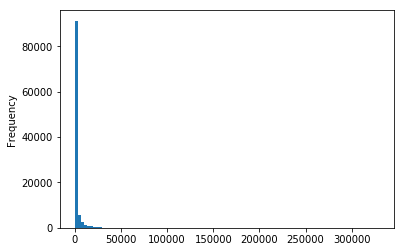

In [65]:
df_C.emp_mean_2013_2015.plot(kind='hist', bins=100)

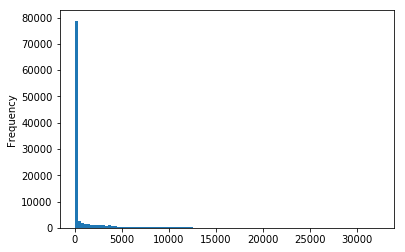

In [66]:
df_C.dropna(subset=['t_centile']).emp_mean_2013_2015.plot(kind='hist', bins=100)
# df_C.loc[df_C['emp_mean_2013_2015'] < T_95_percentile_earnings].dropna(subset=['t_centile']).emp_mean_2013_2015.plot(kind='hist', bins=100)

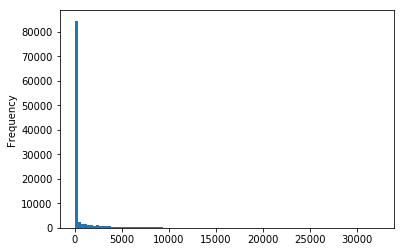

In [68]:
df_C.dropna(subset=['t_centile']).emp_mean_2013_2015.plot(kind='hist',weights=df_C.dropna(subset=['t_centile']).weight.values, bins=100)

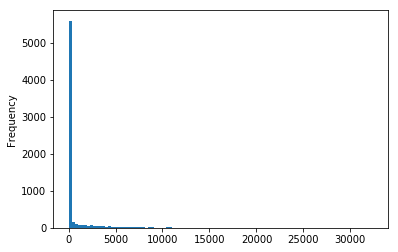

In [69]:
df_T.emp_mean_2013_2015.plot(kind='hist', bins=100)

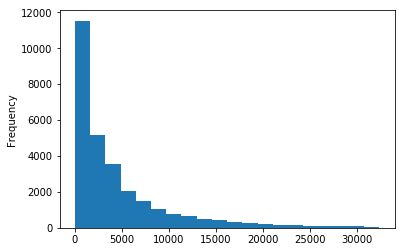

In [70]:
df_C.loc[df_C['emp_mean_2013_2015'] > 0].dropna(subset=['t_centile']).emp_mean_2013_2015.plot(kind='hist', bins=20)

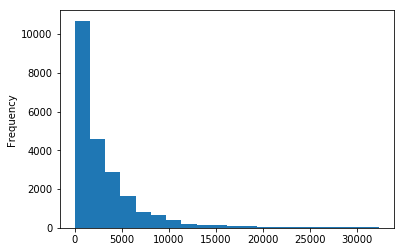

In [71]:
df_C.loc[df_C['emp_mean_2013_2015'] > 0].dropna(subset=['t_centile']).emp_mean_2013_2015.plot(kind='hist', bins=20, weights=df_C.loc[df_C['emp_mean_2013_2015'] > 0].dropna(subset=['t_centile']).weight.values)

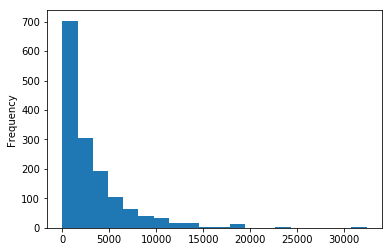

In [72]:
df_T.loc[df_T['emp_mean_2013_2015'] > 0].emp_mean_2013_2015.plot(kind='hist',bins=20)

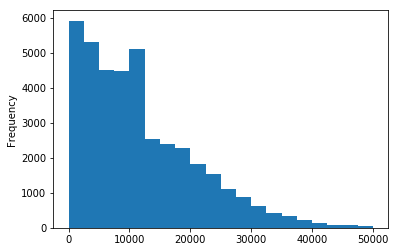

In [73]:
df_C.loc[(df_C['emp_2017'] > 0) & 
         (df_C['emp_2017'] < 50000)].dropna(subset=['t_centile']).emp_2017.plot(kind='hist', bins=20)

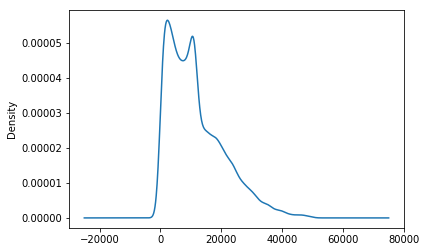

In [74]:
df_C.loc[(df_C['emp_2017'] > 0) & 
         (df_C['emp_2017'] < 50000)].dropna(subset=['t_centile']).emp_2017.plot(kind='density')

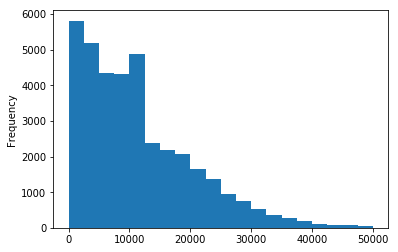

In [75]:
#df_C.dropna(subset=['t_centile'])["emp_2017"] <.emp_2017.plot(kind='hist',weights=df_C.weight.values, bins=100)
df_C.loc[(df_C['emp_2017'] > 0) & 
         (df_C['emp_2017'] < 50000)].dropna(subset=['t_centile']).emp_2017.plot(kind='hist', bins=20, 
                                                                                weights=df_C.loc[(df_C['emp_2017'] > 0) & 
                                                                                                 (df_C['emp_2017'] < 50000)].dropna(subset = 
                                                                                                                                    ['t_centile']).weight.values)

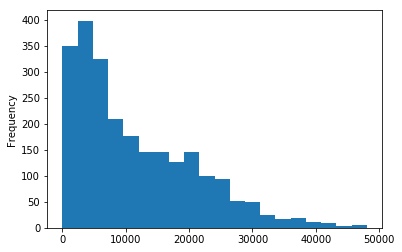

In [76]:
df_T[(df_T['emp_2017'] > 0) & (df_T['emp_2017'] < 50000)].emp_2017.plot(kind='hist',bins=20) #,ylim = (0, 100))

In [83]:
df_T['emp_mean_2013_2015'].max()

32397.0

In [87]:
df_T['emp_2017'].max()

69925.0

In [84]:
df_C.dropna(subset=['t_centile'])['emp_mean_2013_2015'].max()

32382.666666666668

In [88]:
df_C.dropna(subset=['t_centile'])['emp_2017'].max()

713494.0

(0, 40000)

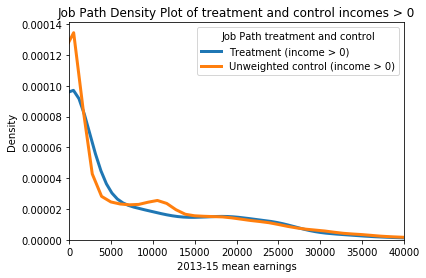

In [89]:
# Two plots
sns.distplot(df_T[(df_T['emp_mean_2013_2015'] > 0)].emp_2017, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Treatment (income > 0)')
sns.distplot(df_C.loc[(df_C['emp_mean_2013_2015'] > 0)].dropna(subset=['t_centile']).emp_2017, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Unweighted control (income > 0)')
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Job Path treatment and control')
plt.title('Job Path Density Plot of treatment and control incomes > 0')
plt.xlabel('2013-15 mean earnings')
plt.ylabel('Density')
plt.xlim(0, 40000)


(0, 70000)

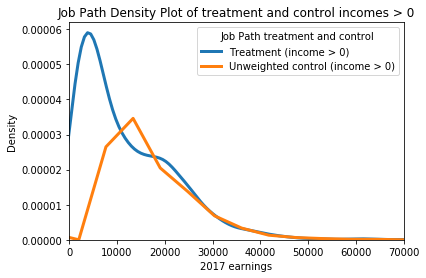

In [90]:
# Two plots
sns.distplot(df_T[(df_T['emp_2017'] > 0)].emp_2017, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Treatment (income > 0)')
sns.distplot(df_C.loc[(df_C['emp_2017'] > 0)].dropna(subset=['t_centile']).emp_2017, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Unweighted control (income > 0)')
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Job Path treatment and control')
plt.title('Job Path Density Plot of treatment and control incomes > 0')
plt.xlabel('2017 earnings')
plt.ylabel('Density')
plt.xlim(0, 70000)

(0, 70000)

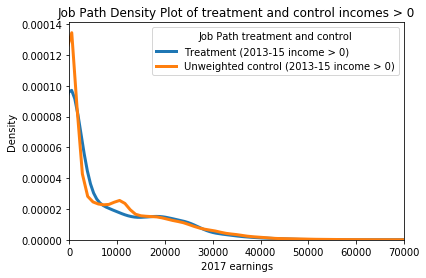

In [91]:
# Two plots
sns.distplot(df_T[(df_T['emp_mean_2013_2015'] > 0)].emp_2017, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Treatment (2013-15 income > 0)')
sns.distplot(df_C.loc[(df_C['emp_mean_2013_2015'] > 0)].dropna(subset=['t_centile']).emp_2017, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Unweighted control (2013-15 income > 0)')
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Job Path treatment and control')
plt.title('Job Path Density Plot of treatment and control incomes > 0')
plt.xlabel('2017 earnings')
plt.ylabel('Density')
plt.xlim(0, 70000)

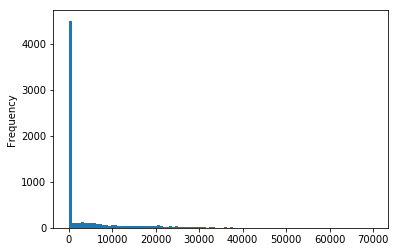

In [88]:
df_T.emp_2017.plot(kind='hist',bins=100)

# Check weights.

In [150]:
# We would expect the frequency of the weights to match the frequency of the t_centile. 
# We would also expect the weights to be inversely related to their frequencies. 
# However, this isn't always true, since some t_centile will have the same frequency and the same weight.
# Given that, the figures appear to line up as expected, with 5 cases where different t_centile pairs have the same weight.
df_C['t_centile'].value_counts()

99    3451
97    1858
1     1742
98    1588
0     1546
7     1467
4     1408
94    1357
2     1357
80    1326
89    1315
93    1307
3     1289
96    1258
5     1225
92    1219
18    1214
88    1210
81    1189
48    1163
84    1162
82    1162
20    1155
85    1143
91    1120
87    1099
58    1097
86    1087
9     1086
95    1071
      ... 
46     872
76     867
59     855
74     852
62     851
25     843
42     842
53     841
17     835
69     832
35     830
40     828
44     823
57     815
26     813
51     809
22     808
12     800
52     797
21     795
77     789
30     780
29     778
41     774
28     773
33     771
11     743
24     705
31     704
64     678
Name: t_centile, Length: 100, dtype: int64

In [151]:
df_C['weight'].value_counts()

0.302055    3451
0.757027    2714
0.884067    2324
1.107750    1882
1.111293    1876
0.552899    1858
1.112986    1846
0.589716    1742
0.646905    1588
0.674252    1546
0.700263    1467
0.729606    1408
0.786118    1326
0.781206    1315
0.797546    1307
0.808683    1289
0.828611    1258
0.838601    1225
0.842728    1219
0.846199    1214
0.848996    1210
0.863991    1189
0.896297    1163
0.889425    1155
0.898763    1143
0.917219    1120
0.948492    1099
0.950221    1097
0.945065    1087
0.959846    1086
            ... 
1.195405     872
1.184874     867
1.201504     855
1.223466     852
1.207151     851
1.236528     843
1.220054     842
1.221505     841
1.230282     835
1.234718     832
1.255895     830
1.240683     828
1.248221     823
1.260473     815
1.263574     813
1.288495     809
1.290090     808
1.302991     800
1.288941     797
1.292183     795
1.321157     789
1.336401     780
1.339837     778
1.346761     774
1.328960     773
1.332407     771
1.382619     743
1.457143     7

# By cluster

Text(0,0.5,'Density')

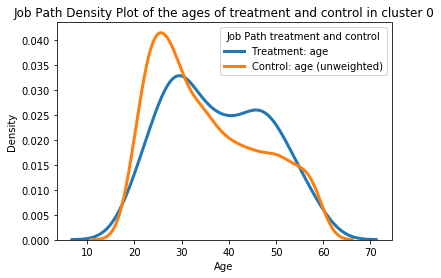

In [97]:
# plot(s)
sns.distplot(df_T[(df_T['cluster'] == 0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Treatment: age')
sns.distplot(df_C.loc[(df_C['cluster'] == 0)].dropna(subset=['t_centile']).age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Control: age (unweighted)')
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Job Path treatment and control')
plt.title('Job Path Density Plot of the ages of treatment and control in cluster 0')
plt.xlabel('Age')
plt.ylabel('Density')
#plt.xlim(0, 75)

In [119]:
# plots

#ordered_clusters = df.cluster.value_counts().index
#g = sns.FacetGrid(df, row="cluster", row_order=ordered_clusters)

#g.map(sns.distplot, "age", hist=False, rug=True);

No handles with labels found to put in legend.


Text(0,0.5,'Density')

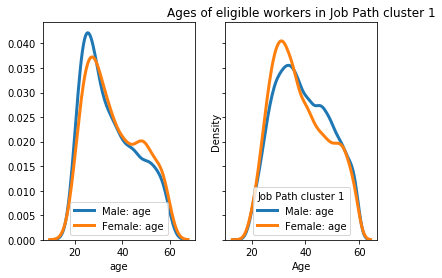

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(df[(df['cluster'] == 0) & (df['sex'] == 1.0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Male: age', ax=ax1)
sns.distplot(df[(df['cluster'] == 0) & (df['sex'] == 2.0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Female: age', ax=ax1)
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Job Path cluster 0')
plt.title('Ages of eligible workers in Job Path cluster 0')
plt.xlabel('Age')
plt.ylabel('Density')

sns.distplot(df[(df['cluster'] == 1) & (df['sex'] == 1.0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Male: age', ax=ax2)
sns.distplot(df[(df['cluster'] == 1) & (df['sex'] == 2.0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Female: age', ax=ax2)
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Job Path cluster 1')
plt.title('Ages of eligible workers in Job Path cluster 1')
plt.xlabel('Age')
plt.ylabel('Density')

Text(0,0.5,'Density')

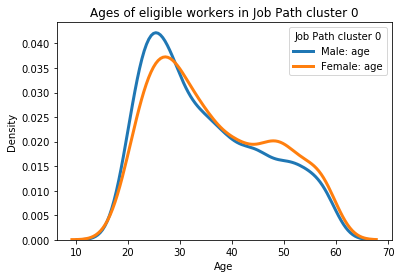

In [116]:
# plots
sns.distplot(df[(df['cluster'] == 0) & (df['sex'] == 1.0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Male: age')
sns.distplot(df[(df['cluster'] == 0) & (df['sex'] == 2.0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Female: age')
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Job Path cluster 0')
plt.title('Ages of eligible workers in Job Path cluster 0')
plt.xlabel('Age')
plt.ylabel('Density')


In [112]:
df[df['cluster'] == 0]['sex'].value_counts()

1.0    1986
2.0    1156
Name: sex, dtype: int64

In [113]:
round(df[df['cluster'] == 0]['sex'].value_counts() / df[df['cluster'] == 0]['sex'].count(), 2)

1.0    0.63
2.0    0.37
Name: sex, dtype: float64

Text(0,0.5,'Density')

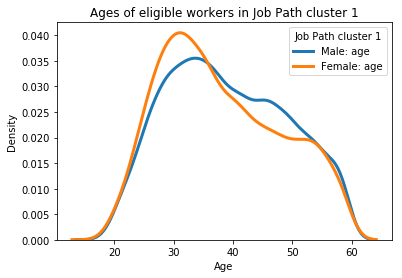

In [114]:
# plot(s)
sns.distplot(df[(df['cluster'] == 1) & (df['sex'] == 1.0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Male: age')
sns.distplot(df[(df['cluster'] == 1) & (df['sex'] == 2.0)].age, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, label = 'Female: age')
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Job Path cluster 1')
plt.title('Ages of eligible workers in Job Path cluster 1')
plt.xlabel('Age')
plt.ylabel('Density')
#plt.xlim(0, 75)

## P - Values of variables

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

x=['cluster',
'age',
'Duration Bands',
'sex',
]
y=['jp_started_P1']
X=data_final[x]
Y=data_final[y]

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

## Variable importance by logistic

In [ ]:
import numpy as np    
from sklearn.linear_model import LogisticRegression

x=['cluster',
'age',
'Duration Bands',
'sex',
]
y=['jp_started_P1']
X=data_final[x]
Y=data_final[y]

m = LogisticRegression()
m.fit(X/ np.std(X, 0), Y)

# The estimated coefficients will all be around 1:
print(m.coef_)



## Variable importance by Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
x=['cluster',
   'age',
'Duration Bands',
'sex',
'LM_code_rank_P1',
'occupation_rank_P1',
'ada_code_rank_P1',
'family_flag_rank_P1',
'marital_status_rank_P1','Sum_2012-2015']
y=['jp_started_P1']

X=data_final[x]
Y=data_final[y]
model.fit(X,Y)
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X)), reverse=True)
print (sorted_feature_importance)

## Propensity Scores Calculation for 8 quarters (Logistic Regression)

In [ ]:
appended_data = []
for i in range(1,9):
    #variable initialization 
    jp_started = 'jp_started_P'+str(i)
    data_jp_i = 'data_jp_i'+str(i)
    data_jp_i = data_final[(data_final[jp_started] == 1) | (data_final[jp_started] == 0) ]
    LM_code_rank = 'LM_code_rank_P'+str(i)
    age = 'age'
    sex = 'sex'
    ada_code_rank = 'ada_code_rank_P'+str(i)
    family_flag_rank = 'family_flag_rank_P'+str(i)
    marital_status_rank = 'marital_status_rank_P'+str(i)
    Propensity='Propensity'+str(i)
    Probability='Probability'+str(i)
    # propensity score calculation
    from sklearn.linear_model import LogisticRegression
    names = [age,'Duration Bands',sex]
    propensity = LogisticRegression()
    propensity = propensity.fit(data_jp_i[names], data_jp_i[jp_started])
    pscore = propensity.predict_proba(data_jp_i[names])[:,1] # The predicted propensities by the model
    data_jp_i[Propensity] = pscore
    data_jp_i[Probability] = 1-pscore
    keep = [Propensity,Probability, age, sex,jp_started]
    data_jp_i = data_jp_i[keep]
    appended_data.append(data_jp_i)
    
appended_data = pd.concat(appended_data, axis=1)

In [ ]:
appended_data.head()

In [ ]:
appended_data_final = []
# Common attributes
keep1 = ['cluster','ppsn','age','sex','Duration Bands']
df = data_final[(data_final[jp_started] == 1) | (data_final[jp_started] == 0) ]
df = df[keep1]
appended_data_final = pd.concat([df,appended_data], axis=1)
appended_data_final.to_csv('propensity_scores.csv')

## Propensity Scores Calculation for 1 quarter (Random Forest)

In [ ]:
non_treated_df = data_final[data_final.jp_started_P1 == 0]
treated_df = data_final[data_final.jp_started_P1 == 1]
data_jp=pd.concat([treated_df,non_treated_df])
data_jp=data_jp.reset_index()

from sklearn.ensemble import RandomForestRegressor

names2 = ['Sum_2012-2015', 'age',  'occupation_rank_P1','Duration Bands','ada_code_rank_P1', 'cluster']

propensity2 = RandomForestRegressor()

propensity2 = propensity2.fit(data_jp[names2], data_jp.jp_started_P1)
pscore2 = propensity2.predict(data_jp[names2]) # The predicted propensities by the model
print(pscore2[:5])

data_jp['Propensity_RF'] = pscore2

## Propensity Score distribution Graphically 

In [ ]:
import matplotlib.pyplot as plt


ax1 = plt.subplot2grid((1,1), (0,0))


data_jp.groupby("jp_started_P1").Propensity.plot(kind='hist', ax=ax1,alpha=0.6,bins = np.arange(min(data_jp['Propensity']),max(data_jp['Propensity']),.05))
data_jp.groupby("jp_started_P1").Propensity.plot(kind='kde', ax=ax1,secondary_y=True,legend = True)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


unique_vals = data_jp['jp_started_P1'].unique()
print(unique_vals)

# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [data_jp.loc[data_jp['jp_started_P1'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(target[['Propensity']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})


In [ ]:
data_jp.Propensity.hist(by=data_jp.jp_started_P1)

In [ ]:
data_jp.Propensity_RF.hist(by=data_jp.jp_started_P1)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


unique_vals = data_jp['jp_started_P1'].unique()
print(unique_vals)

# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [data_jp.loc[data_jp['jp_started_P1'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(target[['Propensity_RF']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

## Matching of Propensity score between Treatment & Control Group

In [ ]:
def Match(groups, propensity, caliper = 0.05):
    
    # Check inputs
    if any(propensity <0) or any(propensity >1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0<caliper<1):
        raise ValueError('Caliper must be between 0 and 1')
    elif len(groups)!= len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(groups.unique()) != 2:
        raise ValueError('wrong number of groups')


    # Code groups as 0 and 1
    groups = groups == groups.unique()[0]
    N = len(groups)
    N1 = groups.sum(); N2 = N-N1
    g1, g2 = propensity[groups == 1], (propensity[groups == 0])

    # Check if treatment groups got flipped - treatment (coded 1) should be the smaller
    if N1 > N2:
       N1, N2, g1, g2 = N2, N1, g2, g1 

    
    # Randomly permute the smaller group to get order for matching
    morder = np.random.permutation(N1)
    matches = pd.Series(np.empty(N1))
    matches[:] = np.NAN
    for m in morder:
        dist = abs(g1[m]- g2)
        if dist.min() <= caliper:
            matches[m] = dist.idxmin()
            g2 = g2.drop(matches[m])
    return (matches)

In [ ]:
#Displaying propensity scores side by side for both the groups

stuff = Match(data_jp.jp_started_P1, data_jp.Propensity)
g1, g2 = data_jp.Propensity[data_jp.jp_started_P1==1], data_jp.Propensity[data_jp.jp_started_P1==0]
stuff = stuff.dropna()
stuff = stuff.astype(int)

In [ ]:
line = []
line1 =[]
for i, v in stuff.iteritems():
    
    #Logistic
    line=[g1[i],g2[v],data_jp['ppsn'][i],data_jp['Duration Bands'][i],data_jp.cluster[i],data_jp.LM_code_rank_P1[i],data_jp.marital_status_rank_P1[i],data_jp.family_flag_rank_P1[i],data_jp['Sum_2012-2015'][i],data_jp['ppsn'][v],data_jp['Duration Bands'][v],data_jp.cluster[v],data_jp.LM_code_rank_P1[v],data_jp.marital_status_rank_P1[v],data_jp.family_flag_rank_P1[v],data_jp['Sum_2012-2015'][v]]
    #Random 
    #line=[g1[i],g2[v],data_jp['ppsn'][i],data_jp['Duration Bands'][i],data_jp.cluster[i],data_jp.age[i],data_jp.ada_code_rank_P1[i],data_jp.occupation_rank_P1[i],data_jp['Sum_2012-2015'][i],data_jp['ppsn'][v],data_jp['Duration Bands'][v],data_jp.cluster[v],data_jp.age[v],data_jp.ada_code_rank_P1[v],data_jp.occupation_rank_P1[v],data_jp['Sum_2012-2015'][v]]
    
    line1.append(line)
    
df=pd.DataFrame(line1)

In [ ]:
#df.to_csv('propensity_Random.csv')
df.to_csv('propensity_logistic.csv')

### Description of outcome, by cluster

In [ ]:
list(data_jp)

In [ ]:
print(' ')
# Crosstab of outcomes, raw numbers
tab_lab_detoutcome_countsP1 = pd.crosstab(index = data_jp['status_simple_P1'], 
                                      columns = data_jp['cluster'], 
                                      margins = True).round(2)

display(tab_lab_detoutcome_countsP1)
# Select totals columns 
# totals = tab_lab_detoutcome_counts['All'].map(lambda x: "{:,}".format(x))

# # Cross tab of outcomes, normalised for each nationality group.
tab_lab_detoutcome_freq1 = pd.crosstab(index = data_jp['status_simple_P1'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq1)


tab_lab_detoutcome_freq2 = pd.crosstab(index = data_jp['status_simple_P2'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq2)

tab_lab_detoutcome_freq3 = pd.crosstab(index = data_jp['status_simple_P3'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq3)

tab_lab_detoutcome_freq4 = pd.crosstab(index = data_jp['status_simple_P4'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq4)

tab_lab_detoutcome_freq5 = pd.crosstab(index = data_jp['status_simple_P5'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq5)

tab_lab_detoutcome_freq6 = pd.crosstab(index = data_jp['status_simple_P6'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq6)


# # Reorder columns
# tab_lab_detoutcome_freq = tab_lab_detoutcome_freq[column_order]

# # Create a row containing totals
# tab_lab_detoutcome_freq.loc['All'] = tab_lab_detoutcome_freq.sum().round(1)

# # Join totals and frequency tables
# joined_table = pd.concat([tab_lab_detoutcome_freq, totals], axis = 1)   

# # rename rows and columns
# joined_table = joined_table.rename(columns = {'All' : 'N'})
# joined_table = joined_table.rename({'All' : 'All outcomes'})

# # output
# display(joined_table)

# # spacing for output
# print(color.BOLD + 'Table 18: ' + color.END +' Labour market outcomes by nationality group' )
# print('(Source: DEASP Administrative Data)')


print(' ')
in_LR =  data_jp.loc[ data_jp['status_simple_P2'] == 'On Live Register']


in_LR_by_sex = pd.crosstab(index = in_LR['sex'], 
                                      columns = in_LR['cluster'],
                                      margins = True).round(2)


display(in_LR_by_sex)
#in_emp_by_age = in_emp_by_age[column_order]
#in_LR_by_sex['Total'] = in_LR_by_sex.sum(axis =1)


# display(in_emp_by_age.applymap(lambda x: "{:,}".format(x)))
# print(color.BOLD + 'Table X: ' + color.END)


# display(claims_by_age_nat.astype(int).applymap(lambda x: "{:,}".format(x)))
# print(color.BOLD + 'Table X: ' + color.END)

#proportion_employment = in_emp_by_age.div(claims_by_age_nat).mul(100).round(2)

#display(proportion_employment[:-1])
